<h3>About Dataset</h3>

The implemented attacks include Brute Force FTP, Brute Force SSH, DoS, Heartbleed, Web Attack, Infiltration, Botnet and DDoS. They have been executed both morning and afternoon on Tuesday, Wednesday, Thursday and Friday.

<br>Day, Description
<br>
<br>Monday, Normal Activity
<br>Tuesday, attacks + Normal Activity
<br>Wednesday, attacks + Normal Activity
<br>Thursday, attacks + Normal Activity
<br>Friday, attacks + Normal Activity
<br>
<br>They have split the csv into 8 different files (for the different days)

In [1]:
import numpy as np 
import pandas as pd 
import glob
import matplotlib.pyplot as plt
import seaborn as sns
import time
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score,f1_score
from sklearn.metrics import classification_report

In [2]:
# display all columns
pd.set_option("display.max_columns", None)

In [3]:
# path to where ML files are stored
path = 'C:/Users/Mr.Dmon/Downloads/Datasets/CICIDS/MachineLearningCSV/'
all_files = glob.glob(path + "/*.csv")

# concatenate the 8 files into 1
dataset = pd.concat((pd.read_csv(f) for f in all_files))

**Add column labels**

In [4]:
col_names = ["Destination_Port",
             "Flow_Duration", 
             "Total_Fwd_Packets",
             "Total_Backward_Packets",
             "Total_Length_of_Fwd_Packets", 
             "Total_Length_of_Bwd_Packets", 
             "Fwd_Packet_Length_Max", 
             "Fwd_Packet_Length_Min", 
             "Fwd_Packet_Length_Mean", 
             "Fwd_Packet_Length_Std",
             "Bwd_Packet_Length_Max", 
             "Bwd_Packet_Length_Min", 
             "Bwd_Packet_Length_Mean", 
             "Bwd_Packet_Length_Std",
             "Flow_Bytes_s", 
             "Flow_Packets_s", 
             "Flow_IAT_Mean", 
             "Flow_IAT_Std", 
             "Flow_IAT_Max", 
             "Flow_IAT_Min",
             "Fwd_IAT_Total", 
             "Fwd_IAT_Mean", 
             "Fwd_IAT_Std", 
             "Fwd_IAT_Max", 
             "Fwd_IAT_Min",
             "Bwd_IAT_Total", 
             "Bwd_IAT_Mean", 
             "Bwd_IAT_Std", 
             "Bwd_IAT_Max", 
             "Bwd_IAT_Min",
             "Fwd_PSH_Flags", 
             "Bwd_PSH_Flags", 
             "Fwd_URG_Flags", 
             "Bwd_URG_Flags", 
             "Fwd_Header_Length", 
             "Bwd_Header_Length",
             "Fwd_Packets_s", 
             "Bwd_Packets_s", 
             "Min_Packet_Length", 
             "Max_Packet_Length", 
             "Packet_Length_Mean", 
             "Packet_Length_Std", 
             "Packet_Length_Variance",
             "FIN_Flag_Count", 
             "SYN_Flag_Count", 
             "RST_Flag_Count", 
             "PSH_Flag_Count", 
             "ACK_Flag_Count", 
             "URG_Flag_Count", 
             "CWE_Flag_Count", 
             "ECE_Flag_Count", 
             "Down_Up_Ratio", 
             "Average_Packet_Size", 
             "Avg_Fwd_Segment_Size", 
             "Avg_Bwd_Segment_Size", 
             "Fwd_Header_Length",
             "Fwd_Avg_Bytes_Bulk", 
             "Fwd_Avg_Packets_Bulk", 
             "Fwd_Avg_Bulk_Rate", 
             "Bwd_Avg_Bytes_Bulk", 
             "Bwd_Avg_Packets_Bulk",
             "Bwd_Avg_Bulk_Rate",
             "Subflow_Fwd_Packets", 
             "Subflow_Fwd_Bytes", 
             "Subflow_Bwd_Packets", 
             "Subflow_Bwd_Bytes",
             "Init_Win_bytes_forward", 
             "Init_Win_bytes_backward", 
             "act_data_pkt_fwd", 
             "min_seg_size_forward",
             "Active_Mean", 
             "Active_Std", 
             "Active_Max", 
             "Active_Min",
             "Idle_Mean", 
             "Idle_Std", 
             "Idle_Max", 
             "Idle_Min", 
             "Label"
            ]


# Assign the column names
dataset.columns = col_names

In [5]:
dataset.shape

(2830743, 79)

In [6]:
dataset.head()

,Destination_Port,Flow_Duration,Total_Fwd_Packets,Total_Backward_Packets,Total_Length_of_Fwd_Packets,Total_Length_of_Bwd_Packets,Fwd_Packet_Length_Max,Fwd_Packet_Length_Min,Fwd_Packet_Length_Mean,Fwd_Packet_Length_Std,Bwd_Packet_Length_Max,Bwd_Packet_Length_Min,Bwd_Packet_Length_Mean,Bwd_Packet_Length_Std,Flow_Bytes_s,Flow_Packets_s,Flow_IAT_Mean,Flow_IAT_Std,Flow_IAT_Max,Flow_IAT_Min,Fwd_IAT_Total,Fwd_IAT_Mean,Fwd_IAT_Std,Fwd_IAT_Max,Fwd_IAT_Min,Bwd_IAT_Total,Bwd_IAT_Mean,Bwd_IAT_Std,Bwd_IAT_Max,Bwd_IAT_Min,Fwd_PSH_Flags,Bwd_PSH_Flags,Fwd_URG_Flags,Bwd_URG_Flags,Fwd_Header_Length,Bwd_Header_Length,Fwd_Packets_s,Bwd_Packets_s,Min_Packet_Length,Max_Packet_Length,Packet_Length_Mean,Packet_Length_Std,Packet_Length_Variance,FIN_Flag_Count,SYN_Flag_Count,RST_Flag_Count,PSH_Flag_Count,ACK_Flag_Count,URG_Flag_Count,CWE_Flag_Count,ECE_Flag_Count,Down_Up_Ratio,Average_Packet_Size,Avg_Fwd_Segment_Size,Avg_Bwd_Segment_Size,Fwd_Header_Length,Fwd_Avg_Bytes_Bulk,Fwd_Avg_Packets_Bulk,Fwd_Avg_Bulk_Rate,Bwd_Avg_Bytes_Bulk,Bwd_Avg_Packets_Bulk,Bwd_Avg_Bulk_Rate,Subflow_Fwd_Packets,Subflow_Fwd_Bytes,Subflow_Bwd_Packets,Subflow_Bwd_Bytes,Init_Win_bytes_forward,Init_Win_bytes_backward,act_data_pkt_fwd,min_seg_size_forward,Active_Mean,Active_Std,Active_Max,Active_Min,Idle_Mean,Idle_Std,Idle_Max,Idle_Min,Label
0,54865,3,2,0,12,0,6,6,6.0,0.0,0,0,0.0,0.0,4.000000e+06,666666.66670,3.0,0.0,3,3,3,3.0,0.0,3,3,0,0.0,0.0,0,0,0,0,0,0,40,0,666666.666700,0.000000,6,6,6.0,0.0,0.0,0,0,0,0,1,0,0,0,0,9.0,6.0,0.0,40,0,0,0,0,0,0,2,12,0,0,33,-1,1,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
1,55054,109,1,1,6,6,6,6,6.0,0.0,6,6,6.0,0.0,1.100917e+05,18348.62385,109.0,0.0,109,109,0,0.0,0.0,0,0,0,0.0,0.0,0,0,0,0,0,0,20,20,9174.311927,9174.311927,6,6,6.0,0.0,0.0,0,0,0,0,1,1,0,0,1,9.0,6.0,6.0,20,0,0,0,0,0,0,1,6,1,6,29,256,0,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2,55055,52,1,1,6,6,6,6,6.0,0.0,6,6,6.0,0.0,2.307692e+05,38461.53846,52.0,0.0,52,52,0,0.0,0.0,0,0,0,0.0,0.0,0,0,0,0,0,0,20,20,19230.769230,19230.769230,6,6,6.0,0.0,0.0,0,0,0,0,1,1,0,0,1,9.0,6.0,6.0,20,0,0,0,0,0,0,1,6,1,6,29,256,0,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
3,46236,34,1,1,6,6,6,6,6.0,0.0,6,6,6.0,0.0,3.529412e+05,58823.52941,34.0,0.0,34,34,0,0.0,0.0,0,0,0,0.0,0.0,0,0,0,0,0,0,20,20,29411.764710,29411.764710,6,6,6.0,0.0,0.0,0,0,0,0,1,1,0,0,1,9.0,6.0,6.0,20,0,0,0,0,0,0,1,6,1,6,31,329,0,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
4,54863,3,2,0,12,0,6,6,6.0,0.0,0,0,0.0,0.0,4.000000e+06,666666.66670,3.0,0.0,3,3,3,3.0,0.0,3,3,0,0.0,0.0,0,0,0,0,0,0,40,0,666666.666700,0.000000,6,6,6.0,0.0,0.0,0,0,0,0,1,0,0,0,0,9.0,6.0,0.0,40,0,0,0,0,0,0,2,12,0,0,32,-1,1,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN


<br>**Check whether there are any duplicate columns**<br>

In [7]:
dataset.columns.duplicated()

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False])

**Delete Duplicate columns**

In [8]:
dataset = dataset.loc[:, ~dataset.columns.duplicated()]

In [9]:
dataset.shape

(2830743, 78)

**Remove NaN/Null/Infinite Values**

In [10]:
# check if there are any Null values
dataset.isnull().any().any()

True

In [11]:
# Replace Infinite values with NaN
dataset = dataset.replace([np.inf, -np.inf], np.nan)
# Drop all occurences of NaN
dataset = dataset.dropna()
# Double check these are all gone
dataset.isnull().any().any()

False

<br><br>**Rename the web attacks**<br><br>

In [12]:
dataset.loc[dataset.Label == 'BENIGN', ['Label']] = 'benign'
dataset.loc[dataset.Label == 'DoS Hulk', ['Label']] = 'hulk'
dataset.loc[dataset.Label == 'PortScan', ['Label']] = 'portscan'
dataset.loc[dataset.Label == 'DDoS', ['Label']] = 'ddos'
dataset.loc[dataset.Label == 'DoS GoldenEye', ['Label']] = 'goldeneye'
dataset.loc[dataset.Label == 'FTP-Patator', ['Label']] = 'ftppatator'
dataset.loc[dataset.Label == 'SSH-Patator', ['Label']] = 'sshpatator'
dataset.loc[dataset.Label == 'DoS slowloris', ['Label']] = 'slowloris'
dataset.loc[dataset.Label == 'DoS Slowhttptest', ['Label']] = 'slowhttptest'
dataset.loc[dataset.Label == 'Bot', ['Label']] = 'bot'
dataset.loc[dataset.Label == 'Web Attack � Brute Force', ['Label']] = 'bruteforce'
dataset.loc[dataset.Label == 'Web Attack � XSS', ['Label']] = 'xss'
dataset.loc[dataset.Label == 'Infiltration', ['Label']] = 'infiltration'
dataset.loc[dataset.Label == 'Web Attack � Sql Injection', ['Label']] = 'sql'
dataset.loc[dataset.Label == 'Heartbleed', ['Label']] = 'heartbleed'

<br>**Explore Attacks in Dataset**<br>
<br>

In [13]:
dataset['Label'].value_counts()

benign          2271320
hulk             230124
portscan         158804
ddos             128025
goldeneye         10293
ftppatator         7935
sshpatator         5897
slowloris          5796
slowhttptest       5499
bot                1956
bruteforce         1507
xss                 652
infiltration         36
sql                  21
heartbleed           11
Name: Label, dtype: int64

In [14]:
dataset = dataset.replace(['heartbleed', 'sql', 'infiltration','benign','hulk'], np.nan)
dataset = dataset.dropna()
path2 = 'C:/Users/Mr.Dmon/Documents/datasets/'
All_files = glob.glob(path2 + "/*.csv")
df = pd.concat((pd.read_csv(f) for f in All_files))
frames = [ df,dataset]
dataset = pd.concat(frames)
dataset = dataset.sample(frac=1).reset_index(drop=True)

In [15]:
dataset['Label'].value_counts()

benign          229556
portscan        158804
ddos            128025
synflood        100834
goldeneye        29112
sql              11698
ftppatator        7935
sshpatator        5897
slowloris         5796
slowhttptest      5499
hulk              3672
bot               1956
bruteforce        1507
xss                652
Name: Label, dtype: int64

**Visualizing Attack Distribution**

C:\Users\Mr.Dmon\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 [Text(0, 0, 'sql'),
  Text(1, 0, 'ddos'),
  Text(2, 0, 'sshpatator'),
  Text(3, 0, 'portscan'),
  Text(4, 0, 'synflood'),
  Text(5, 0, 'goldeneye'),
  Text(6, 0, 'slowloris'),
  Text(7, 0, 'slowhttptest'),
  Text(8, 0, 'ftppatator'),
  Text(9, 0, 'bruteforce'),
  Text(10, 0, 'hulk'),
  Text(11, 0, 'bot'),
  Text(12, 0, 'xss')])

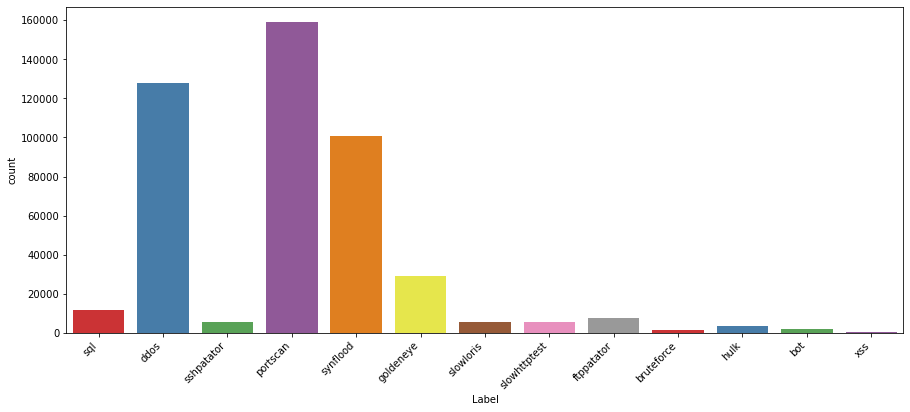

In [16]:
plt_labels = dataset['Label'].where(dataset['Label'] != "benign")
plt.figure(figsize=(15,6))
chart = sns.countplot(plt_labels, palette="Set1")
plt.xticks(rotation=45, horizontalalignment="right")

In [17]:
dataset.head()

,Destination_Port,Flow_Duration,Total_Fwd_Packets,Total_Backward_Packets,Total_Length_of_Fwd_Packets,Total_Length_of_Bwd_Packets,Fwd_Packet_Length_Max,Fwd_Packet_Length_Min,Fwd_Packet_Length_Mean,Fwd_Packet_Length_Std,Bwd_Packet_Length_Max,Bwd_Packet_Length_Min,Bwd_Packet_Length_Mean,Bwd_Packet_Length_Std,Flow_Bytes_s,Flow_Packets_s,Flow_IAT_Mean,Flow_IAT_Std,Flow_IAT_Max,Flow_IAT_Min,Fwd_IAT_Total,Fwd_IAT_Mean,Fwd_IAT_Std,Fwd_IAT_Max,Fwd_IAT_Min,Bwd_IAT_Total,Bwd_IAT_Mean,Bwd_IAT_Std,Bwd_IAT_Max,Bwd_IAT_Min,Fwd_PSH_Flags,Bwd_PSH_Flags,Fwd_URG_Flags,Bwd_URG_Flags,Fwd_Header_Length,Bwd_Header_Length,Fwd_Packets_s,Bwd_Packets_s,Min_Packet_Length,Max_Packet_Length,Packet_Length_Mean,Packet_Length_Std,Packet_Length_Variance,FIN_Flag_Count,SYN_Flag_Count,RST_Flag_Count,PSH_Flag_Count,ACK_Flag_Count,URG_Flag_Count,CWE_Flag_Count,ECE_Flag_Count,Down_Up_Ratio,Average_Packet_Size,Avg_Fwd_Segment_Size,Avg_Bwd_Segment_Size,Fwd_Avg_Bytes_Bulk,Fwd_Avg_Packets_Bulk,Fwd_Avg_Bulk_Rate,Bwd_Avg_Bytes_Bulk,Bwd_Avg_Packets_Bulk,Bwd_Avg_Bulk_Rate,Subflow_Fwd_Packets,Subflow_Fwd_Bytes,Subflow_Bwd_Packets,Subflow_Bwd_Bytes,Init_Win_bytes_forward,Init_Win_bytes_backward,act_data_pkt_fwd,min_seg_size_forward,Active_Mean,Active_Std,Active_Max,Active_Min,Idle_Mean,Idle_Std,Idle_Max,Idle_Min,Label
0,80,3172.0,5,5,925,2016,653.0,66.0,185.000000,234.020512,1744.0,66.0,403.2,670.407160,927175.283700,3152.585120,352.444444,5.037178e+02,1498.0,21.0,3141.0,785.25,7.058029e+02,1832.0,83.0,3151.0,787.75,615.716808,1498.0,80.0,0,0,0,0,100,100,1576.292560,1576.292560,66,1744,294.1,513.817565,264008.49,1,0,0,0,0,0,0,0,1.0,294.100000,185.000000,403.2,0.0,0.0,0.0,0.0,0.0,0.0,5,925,5,2016,64240,505,1,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,sql
1,80,43143.0,3,3,26,11601,20.0,0.0,8.666667,10.263203,11595.0,0.0,3867.0,6692.644993,269499.107600,139.072387,8628.600000,1.171987e+04,21965.0,7.0,22027.0,11013.50,1.556554e+04,22020.0,7.0,43088.0,21544.00,830.143361,22131.0,20957.0,0,0,0,0,72,72,69.536194,69.536194,0,11595,1661.0,4380.487987,19200000.00,0,0,0,1,0,0,0,0,1.0,1937.833333,8.666667,3867.0,0.0,0.0,0.0,0.0,0.0,0.0,3,26,3,11601,8192,229,2,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,ddos
2,22,45.0,1,1,0,0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,44444.444440,45.000000,0.000000e+00,45.0,45.0,0.0,0.00,0.000000e+00,0.0,0.0,0.0,0.00,0.000000,0.0,0.0,0,0,0,0,32,32,22222.222220,22222.222220,0,0,0.0,0.000000,0.00,0,0,0,0,1,1,0,0,1.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,1,0,259,257,0,32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,sshpatator
3,80,3373942.0,5,0,30,0,6.0,6.0,6.000000,0.000000,0.0,0.0,0.0,0.000000,8.891676,1.481946,843485.500000,1.682311e+06,3366951.0,987.0,3373942.0,843485.50,1.682311e+06,3366951.0,987.0,0.0,0.00,0.000000,0.0,0.0,0,0,0,0,100,0,1.481946,0.000000,6,6,6.0,0.000000,0.00,0,0,0,0,1,0,0,0,0.0,7.200000,6.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5,30,0,0,256,-1,4,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,ddos
4,7025,53.0,1,1,0,6,0.0,0.0,0.000000,0.000000,6.0,6.0,6.0,0.000000,113207.547200,37735.849060,53.000000,0.000000e+00,53.0,53.0,0.0,0.00,0.000000e+00,0.0,0.0,0.0,0.00,0.000000,0.0,0.0,0,0,0,0,40,20,18867.924530,18867.924530,0,6,2.0,3.464102,12.00,0,0,0,1,0,0,0,0,1.0,3.000000,0.000000,6.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,1,6,29200,0,0,40,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,portscan


**Splitting dataset into features and labels**

In [18]:
labels = dataset['Label']
features = dataset.loc[:, dataset.columns != 'Label'].astype('float64')

In [19]:
features.head()

,Destination_Port,Flow_Duration,Total_Fwd_Packets,Total_Backward_Packets,Total_Length_of_Fwd_Packets,Total_Length_of_Bwd_Packets,Fwd_Packet_Length_Max,Fwd_Packet_Length_Min,Fwd_Packet_Length_Mean,Fwd_Packet_Length_Std,Bwd_Packet_Length_Max,Bwd_Packet_Length_Min,Bwd_Packet_Length_Mean,Bwd_Packet_Length_Std,Flow_Bytes_s,Flow_Packets_s,Flow_IAT_Mean,Flow_IAT_Std,Flow_IAT_Max,Flow_IAT_Min,Fwd_IAT_Total,Fwd_IAT_Mean,Fwd_IAT_Std,Fwd_IAT_Max,Fwd_IAT_Min,Bwd_IAT_Total,Bwd_IAT_Mean,Bwd_IAT_Std,Bwd_IAT_Max,Bwd_IAT_Min,Fwd_PSH_Flags,Bwd_PSH_Flags,Fwd_URG_Flags,Bwd_URG_Flags,Fwd_Header_Length,Bwd_Header_Length,Fwd_Packets_s,Bwd_Packets_s,Min_Packet_Length,Max_Packet_Length,Packet_Length_Mean,Packet_Length_Std,Packet_Length_Variance,FIN_Flag_Count,SYN_Flag_Count,RST_Flag_Count,PSH_Flag_Count,ACK_Flag_Count,URG_Flag_Count,CWE_Flag_Count,ECE_Flag_Count,Down_Up_Ratio,Average_Packet_Size,Avg_Fwd_Segment_Size,Avg_Bwd_Segment_Size,Fwd_Avg_Bytes_Bulk,Fwd_Avg_Packets_Bulk,Fwd_Avg_Bulk_Rate,Bwd_Avg_Bytes_Bulk,Bwd_Avg_Packets_Bulk,Bwd_Avg_Bulk_Rate,Subflow_Fwd_Packets,Subflow_Fwd_Bytes,Subflow_Bwd_Packets,Subflow_Bwd_Bytes,Init_Win_bytes_forward,Init_Win_bytes_backward,act_data_pkt_fwd,min_seg_size_forward,Active_Mean,Active_Std,Active_Max,Active_Min,Idle_Mean,Idle_Std,Idle_Max,Idle_Min
0,80.0,3172.0,5.0,5.0,925.0,2016.0,653.0,66.0,185.000000,234.020512,1744.0,66.0,403.2,670.407160,927175.283700,3152.585120,352.444444,5.037178e+02,1498.0,21.0,3141.0,785.25,7.058029e+02,1832.0,83.0,3151.0,787.75,615.716808,1498.0,80.0,0.0,0.0,0.0,0.0,100.0,100.0,1576.292560,1576.292560,66.0,1744.0,294.1,513.817565,264008.49,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,294.100000,185.000000,403.2,0.0,0.0,0.0,0.0,0.0,0.0,5.0,925.0,5.0,2016.0,64240.0,505.0,1.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,80.0,43143.0,3.0,3.0,26.0,11601.0,20.0,0.0,8.666667,10.263203,11595.0,0.0,3867.0,6692.644993,269499.107600,139.072387,8628.600000,1.171987e+04,21965.0,7.0,22027.0,11013.50,1.556554e+04,22020.0,7.0,43088.0,21544.00,830.143361,22131.0,20957.0,0.0,0.0,0.0,0.0,72.0,72.0,69.536194,69.536194,0.0,11595.0,1661.0,4380.487987,19200000.00,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1937.833333,8.666667,3867.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,26.0,3.0,11601.0,8192.0,229.0,2.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,22.0,45.0,1.0,1.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,44444.444440,45.000000,0.000000e+00,45.0,45.0,0.0,0.00,0.000000e+00,0.0,0.0,0.0,0.00,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,32.0,32.0,22222.222220,22222.222220,0.0,0.0,0.0,0.000000,0.00,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,259.0,257.0,0.0,32.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,80.0,3373942.0,5.0,0.0,30.0,0.0,6.0,6.0,6.000000,0.000000,0.0,0.0,0.0,0.000000,8.891676,1.481946,843485.500000,1.682311e+06,3366951.0,987.0,3373942.0,843485.50,1.682311e+06,3366951.0,987.0,0.0,0.00,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,100.0,0.0,1.481946,0.000000,6.0,6.0,6.0,0.000000,0.00,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,7.200000,6.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,30.0,0.0,0.0,256.0,-1.0,4.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,7025.0,53.0,1.0,1.0,0.0,6.0,0.0,0.0,0.000000,0.000000,6.0,6.0,6.0,0.000000,113207.547200,37735.849060,53.000000,0.000000e+00,53.0,53.0,0.0,0.00,0.000000e+00,0.0,0.0,0.0,0.00,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,40.0,20.0,18867.924530,18867.924530,0.0,6.0,2.0,3.464102,12.00,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,3.000000,0.000000,6.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,6.0,29200.0,0.0,0.0,40.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [20]:
labels.head()

0           sql
1          ddos
2    sshpatator
3          ddos
4      portscan
Name: Label, dtype: object

**Feature Scaling**

In [21]:
sc = MinMaxScaler()

In [22]:
sc.fit(features)
Features = sc.transform(features)

In [23]:
Features[0]

array([1.22074038e-03, 2.46950100e-05, 1.82934916e-05, 1.71667926e-05,
       7.18790505e-04, 3.14507887e-06, 2.63094279e-02, 3.19612591e-02,
       3.11402876e-02, 3.31968992e-02, 2.71258146e-02, 3.07548928e-02,
       6.95112490e-02, 8.18102423e-02, 6.20603710e-03, 4.00630517e-01,
       3.03703673e-06, 5.94006791e-06, 1.25833321e-05, 2.91666633e-07,
       2.43615056e-05, 6.54375000e-06, 8.36081266e-06, 1.52666667e-05,
       7.91666588e-07, 2.57950219e-05, 6.56458333e-06, 7.29366613e-06,
       1.24833333e-05, 6.66666667e-07, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 9.97598335e-01, 9.94604212e-01,
       5.25430853e-04, 7.88146280e-04, 4.85651214e-02, 2.71258146e-02,
       1.13309075e-01, 1.08594554e-01, 1.17860933e-02, 1.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 6.41025641e-03,
       7.98317047e-02, 3.11402876e-02, 6.95112490e-02, 0.00000000e+00,
      

**Train Test Split**

In [24]:
features_train, features_test, labels_train, labels_test = train_test_split(Features, labels, test_size=.2 )

features_train.shape, features_test.shape, labels_train.shape, labels_test.shape

((552754, 77), (138189, 77), (552754,), (138189,))

**Label encoding**

In [25]:
le = LabelEncoder()
Labels_Train = le.fit_transform(labels_train)
Labels_Test = le.fit_transform(labels_test)

In [26]:
# Categorical labels are replaced with integers.
np.unique(Labels_Train)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13])

In [27]:
def print_status(labels, predictions):
  print("Accuracy = {}".format(accuracy_score(labels, predictions)))
  print("Precision = {}".format(precision_score(labels, predictions, average='macro', zero_division=0)))
  print("Recall = {}".format(recall_score(labels, predictions, average='macro')))


**SVM**

In [28]:
classifier = LinearSVC()

In [29]:
# fit the model
start = time.time()
classifier.fit(features_train, Labels_Train)
end = time.time()
training_time = end - start

In [30]:
# predict validation
start = time.time()
svm_predicted = classifier.predict(features_test)
end = time.time()
predict_time = end  - start
#print(training_time, predict_time)
print("training_time ",training_time)
print("predict_time ",predict_time)

confusion_svm = pd.crosstab(labels_test, svm_predicted)
confusion_svm

training_time  164.92746663093567
predict_time  0.36319613456726074


col_0,0,1,2,3,4,5,6,7,8,9,10,11,12,13
Label,,,,,,,,,,,,,,
benign,41848,30,211,1502,107,291,0,1370,40,93,254,14,47,25
bot,274,5,0,0,0,0,0,103,0,0,0,0,0,0
bruteforce,39,0,225,0,0,1,0,0,0,0,0,0,0,0
ddos,23,0,0,25761,0,1,0,4,0,0,0,0,0,0
ftppatator,229,0,0,2,1345,0,0,0,0,0,0,0,0,0
goldeneye,294,0,0,16,0,5536,10,0,0,1,32,0,1,0
hulk,0,0,0,0,0,2,597,0,0,0,118,0,0,0
portscan,8,0,1,12,0,10,0,31886,1,0,0,0,0,2
slowhttptest,111,0,1,0,0,1,0,2,912,77,0,0,0,0


In [31]:
classes = ['benign', 'bot', 'bruteforce', 'ddos', 'ftppatator', 'goldeneye','hulk','portscan','slowhttptest','slowloris','sql','sshpatator','synflood','xss']

In [32]:
print(classification_report(Labels_Test, svm_predicted, target_names=classes, zero_division=0))

              precision    recall  f1-score   support

      benign       0.96      0.91      0.94     45832
         bot       0.14      0.01      0.02       382
  bruteforce       0.40      0.85      0.54       265
        ddos       0.94      1.00      0.97     25789
  ftppatator       0.88      0.85      0.87      1576
   goldeneye       0.95      0.94      0.94      5890
        hulk       0.98      0.83      0.90       717
    portscan       0.95      1.00      0.97     31920
slowhttptest       0.92      0.83      0.87      1104
   slowloris       0.79      0.55      0.65      1149
         sql       0.84      0.99      0.91      2244
  sshpatator       0.98      0.52      0.68      1230
    synflood       1.00      1.00      1.00     19960
         xss       0.00      0.00      0.00       131

    accuracy                           0.95    138189
   macro avg       0.77      0.73      0.73    138189
weighted avg       0.95      0.95      0.95    138189



In [33]:
print_status((Labels_Test).astype(int),(svm_predicted).astype(int))

Accuracy = 0.9520439398215488
Precision = 0.7669032541925443
Recall = 0.7347068276312194


**Decision Tree Classifier**

In [34]:
classifier = DecisionTreeClassifier(random_state = 0)

In [35]:
# fit the model
start = time.time()
classifier.fit(features_train, Labels_Train)
end = time.time()
training_time = end - start

In [36]:
# predict validation
start = time.time()
dtc_predicted = classifier.predict(features_test)
end = time.time()
predict_time = end  - start
#print(training_time, predict_time)
print("training_time ",training_time)
print("predict_time ",predict_time)

confusion_dtc = pd.crosstab(labels_test, dtc_predicted)
confusion_dtc

training_time  21.026718378067017
predict_time  0.04687023162841797


col_0,0,1,2,3,4,5,6,7,8,9,10,11,12,13
Label,,,,,,,,,,,,,,
benign,45768,23,3,3,0,1,0,25,5,4,0,0,0,0
bot,29,352,1,0,0,0,0,0,0,0,0,0,0,0
bruteforce,0,0,186,0,0,1,0,1,0,0,0,0,0,77
ddos,6,0,0,25783,0,0,0,0,0,0,0,0,0,0
ftppatator,0,0,0,0,1576,0,0,0,0,0,0,0,0,0
goldeneye,6,0,0,0,0,5880,0,0,1,0,3,0,0,0
hulk,0,0,0,0,0,0,717,0,0,0,0,0,0,0
portscan,20,0,0,0,0,0,0,31896,0,0,0,0,0,4
slowhttptest,3,0,1,0,0,2,0,0,1096,2,0,0,0,0


In [37]:
print(classification_report(Labels_Test, dtc_predicted, target_names=classes, zero_division=0))

              precision    recall  f1-score   support

      benign       1.00      1.00      1.00     45832
         bot       0.94      0.92      0.93       382
  bruteforce       0.71      0.70      0.70       265
        ddos       1.00      1.00      1.00     25789
  ftppatator       1.00      1.00      1.00      1576
   goldeneye       1.00      1.00      1.00      5890
        hulk       1.00      1.00      1.00       717
    portscan       1.00      1.00      1.00     31920
slowhttptest       0.99      0.99      0.99      1104
   slowloris       0.99      1.00      1.00      1149
         sql       1.00      1.00      1.00      2244
  sshpatator       1.00      1.00      1.00      1230
    synflood       1.00      1.00      1.00     19960
         xss       0.40      0.42      0.41       131

    accuracy                           1.00    138189
   macro avg       0.93      0.93      0.93    138189
weighted avg       1.00      1.00      1.00    138189



In [38]:
print_status((Labels_Test).astype(int),(dtc_predicted).astype(int))

Accuracy = 0.9977639320061654
Precision = 0.9307725256106912
Recall = 0.9303206721271288


**Naive Bayes**

In [39]:
classifier = MultinomialNB()

In [40]:
# fit the model
start = time.time()
classifier.fit(features_train, Labels_Train)
end = time.time()
training_time = end - start

In [41]:
# predict validation
start = time.time()
nb_predicted = classifier.predict(features_test)
end = time.time()
predict_time = end  - start
#print(training_time, predict_time)
print("training_time ",training_time)
print("predict_time ",predict_time)

confusion_nb = pd.crosstab(labels_test, nb_predicted)
confusion_nb

training_time  0.3163609504699707
predict_time  0.05336928367614746


col_0,0,3,4,5,7,8,9,10,12
Label,,,,,,,,,
benign,39062,748,604,308,2534,799,773,92,912
bot,148,0,0,2,232,0,0,0,0
bruteforce,264,1,0,0,0,0,0,0,0
ddos,9457,16328,0,0,4,0,0,0,0
ftppatator,4,0,799,0,773,0,0,0,0
goldeneye,833,1189,0,3513,0,0,236,40,79
hulk,0,0,0,304,0,0,0,413,0
portscan,39,16,0,0,31837,0,28,0,0
slowhttptest,851,0,0,1,3,219,30,0,0


In [42]:
print(classification_report(Labels_Test, nb_predicted, target_names=classes, zero_division=0))

              precision    recall  f1-score   support

      benign       0.75      0.85      0.80     45832
         bot       0.00      0.00      0.00       382
  bruteforce       0.00      0.00      0.00       265
        ddos       0.89      0.63      0.74     25789
  ftppatator       0.54      0.51      0.52      1576
   goldeneye       0.85      0.60      0.70      5890
        hulk       0.00      0.00      0.00       717
    portscan       0.89      1.00      0.94     31920
slowhttptest       0.21      0.20      0.20      1104
   slowloris       0.36      0.52      0.43      1149
         sql       0.80      0.99      0.89      2244
  sshpatator       0.00      0.00      0.00      1230
    synflood       0.95      1.00      0.97     19960
         xss       0.00      0.00      0.00       131

    accuracy                           0.83    138189
   macro avg       0.45      0.45      0.44    138189
weighted avg       0.82      0.83      0.82    138189



In [43]:
print_status((Labels_Test).astype(int),(nb_predicted).astype(int))

Accuracy = 0.8285174652106897
Precision = 0.44587971678960275
Recall = 0.4494400991512876


**Random Forest**

In [46]:
classifier =  RandomForestClassifier()

In [47]:
# fit the model
start = time.time()
classifier.fit(features_train, Labels_Train)
end = time.time()
training_time = end - start

In [48]:
# predict validation
start = time.time()
rf_predicted = classifier.predict(features_test)
end = time.time()
predict_time = end  - start
#print(training_time, predict_time)
print("training_time ",training_time)
print("predict_time ",predict_time)

confusion_rf = pd.crosstab(labels_test, rf_predicted)
confusion_rf

training_time  171.06273865699768
predict_time  2.320902109146118


col_0,0,1,2,3,4,5,6,7,8,9,10,11,12,13
Label,,,,,,,,,,,,,,
benign,45783,19,0,0,2,1,0,25,2,0,0,0,0,0
bot,24,358,0,0,0,0,0,0,0,0,0,0,0,0
bruteforce,2,0,212,0,0,0,0,1,0,0,0,0,0,50
ddos,5,0,0,25784,0,0,0,0,0,0,0,0,0,0
ftppatator,1,0,0,0,1575,0,0,0,0,0,0,0,0,0
goldeneye,8,0,0,0,0,5879,0,0,1,0,2,0,0,0
hulk,0,0,0,0,0,0,717,0,0,0,0,0,0,0
portscan,1,0,4,0,0,0,0,31915,0,0,0,0,0,0
slowhttptest,0,0,0,0,0,2,0,0,1099,2,0,0,0,1


In [49]:
print(classification_report(Labels_Test, rf_predicted, target_names=classes, zero_division=0))

              precision    recall  f1-score   support

      benign       1.00      1.00      1.00     45832
         bot       0.95      0.94      0.94       382
  bruteforce       0.72      0.80      0.76       265
        ddos       1.00      1.00      1.00     25789
  ftppatator       1.00      1.00      1.00      1576
   goldeneye       1.00      1.00      1.00      5890
        hulk       1.00      1.00      1.00       717
    portscan       1.00      1.00      1.00     31920
slowhttptest       0.99      1.00      1.00      1104
   slowloris       1.00      1.00      1.00      1149
         sql       1.00      1.00      1.00      2244
  sshpatator       1.00      1.00      1.00      1230
    synflood       1.00      1.00      1.00     19960
         xss       0.50      0.39      0.44       131

    accuracy                           1.00    138189
   macro avg       0.94      0.94      0.94    138189
weighted avg       1.00      1.00      1.00    138189



In [50]:
print_status((Labels_Test).astype(int),(rf_predicted).astype(int))

Accuracy = 0.9982343022961306
Precision = 0.9400667858815873
Recall = 0.9365330336722524
